<a href="https://colab.research.google.com/github/nelsooooon/titanic-survival-prediction/blob/main/src/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project**: Titanic Survival Prediction

**Dataset**: Titanic-Dataset.csv

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# **Data Loading**

In [2]:
train_path  = '/content/train.csv'
df = pd.read_csv(train_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **Exploratory Data Analysis (EDA)**

In [5]:
sns.set_style('whitegrid')

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
target_column = 'Survived'

if target_column in numerical_cols:
   numerical_cols.remove(target_column)
if target_column in categorical_cols:
   categorical_cols.remove(target_column)

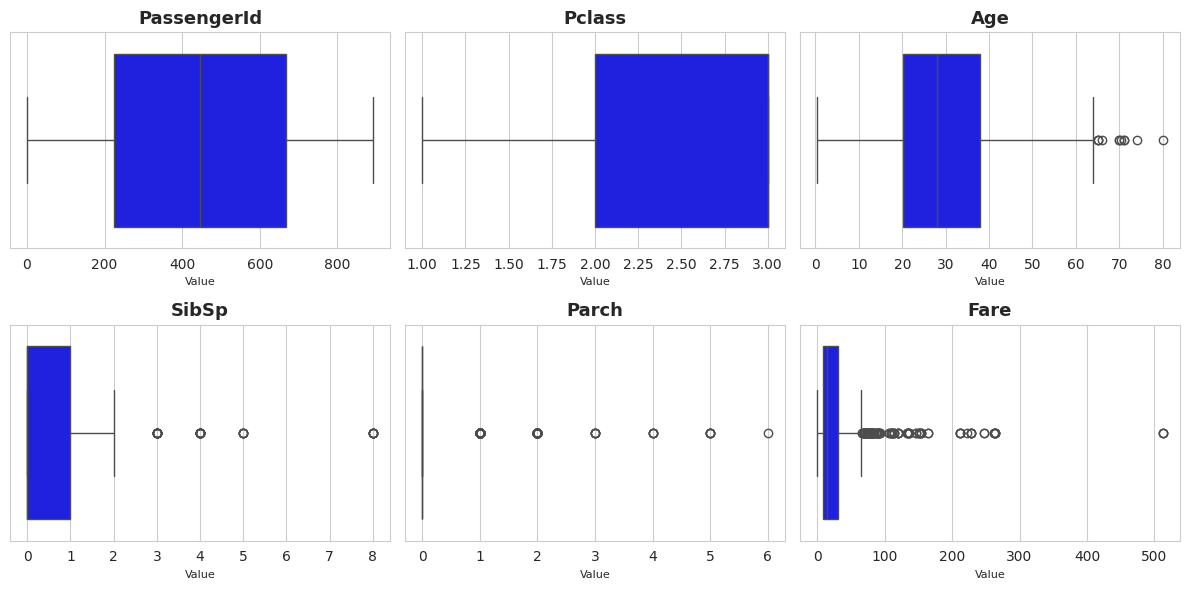

In [7]:
ncols = 3
nrows = (len(numerical_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='blue')
    axes[i].set_title(col, size=13, weight='bold')
    axes[i].set_xlabel('Value', size=8)

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

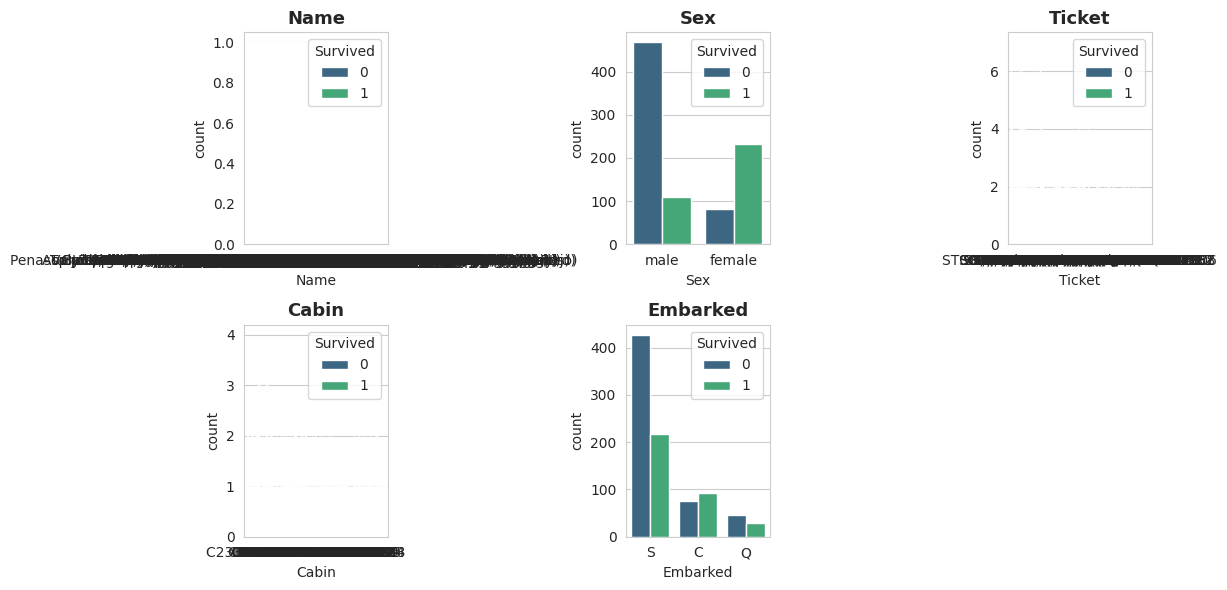

In [8]:
ncols = 3
nrows = (len(categorical_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col,data=df, ax=axes[i], palette='viridis', hue=target_column)
    axes[i].set_title(col, size=13, weight='bold')

for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

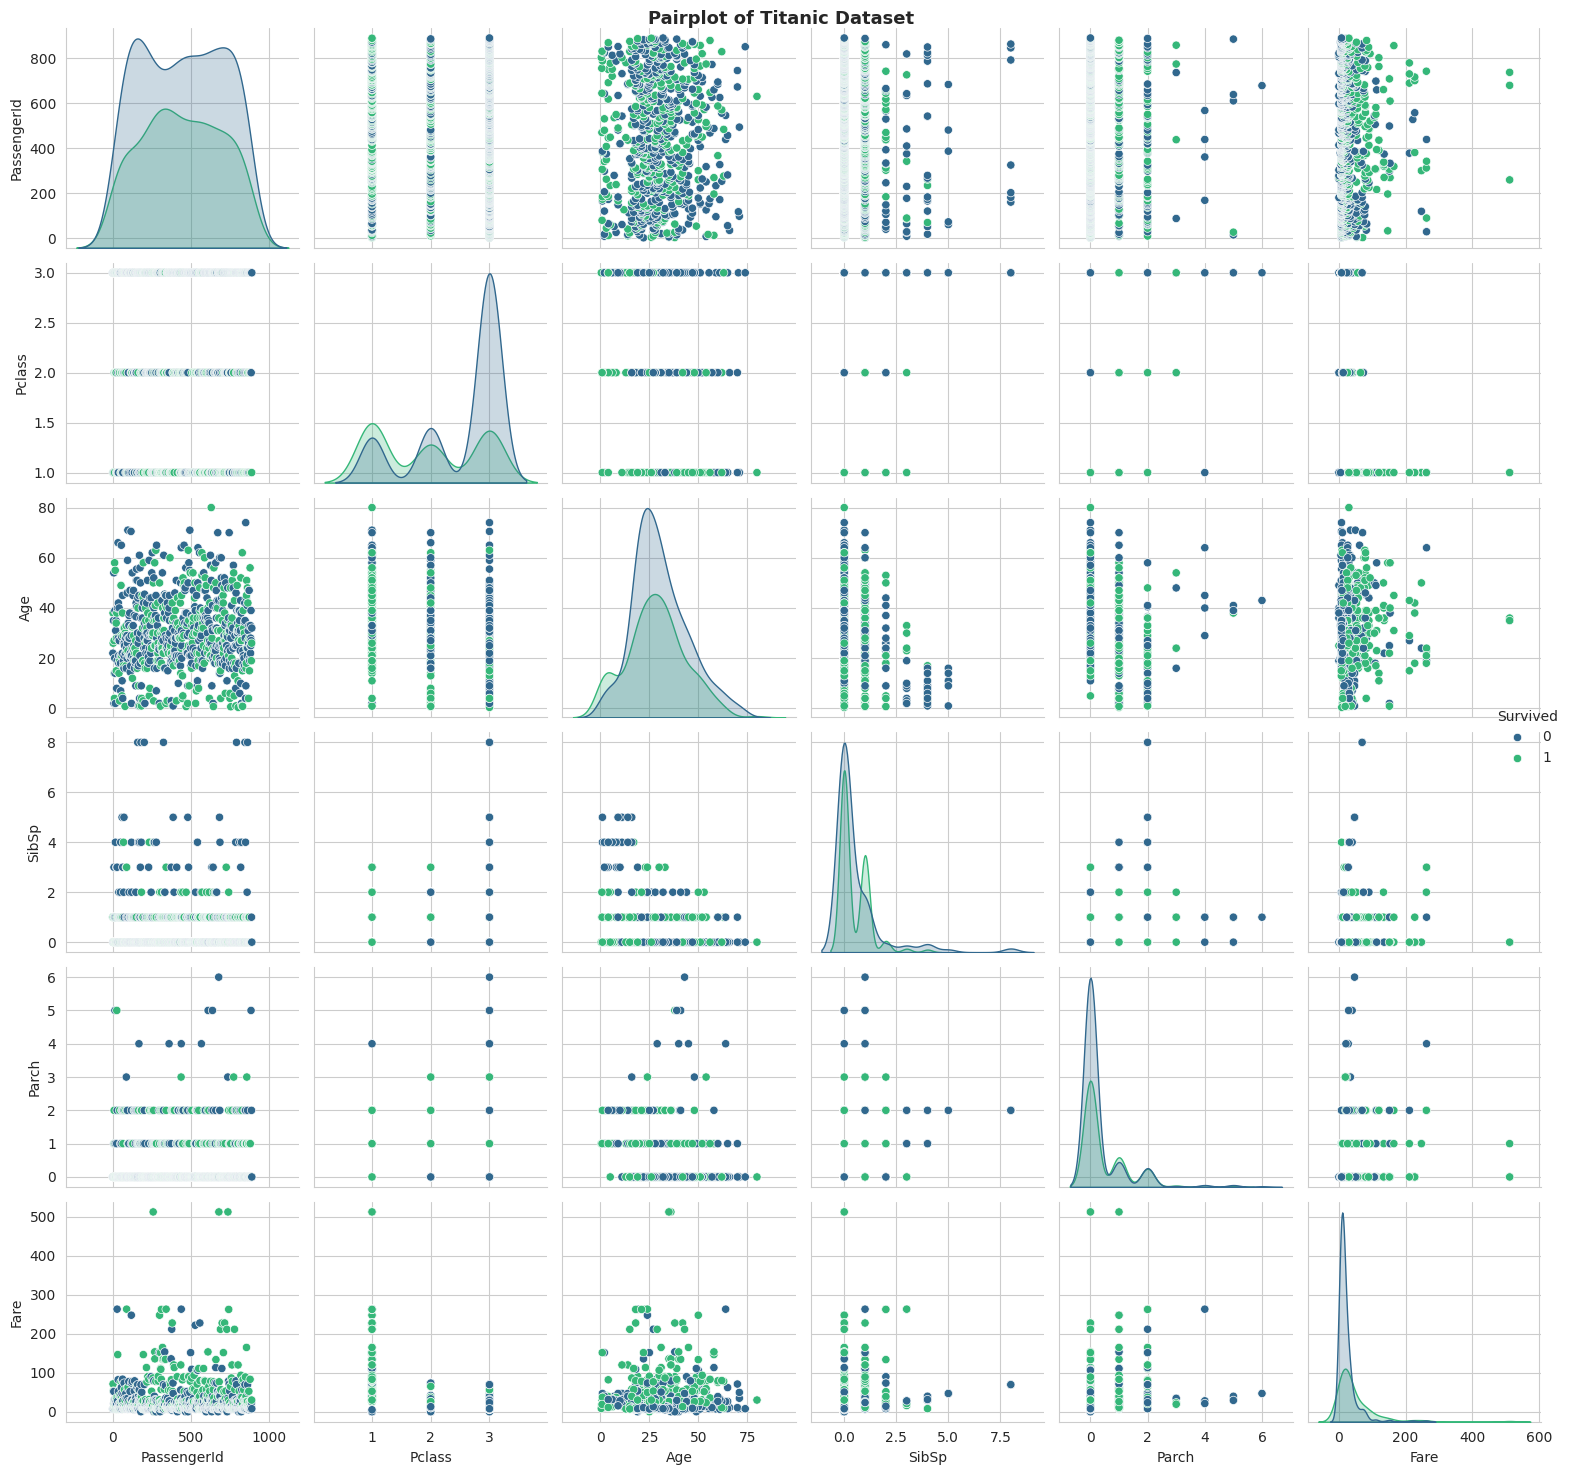

In [9]:
sns.pairplot(df, hue='Survived', palette='viridis')
plt.suptitle('Pairplot of Titanic Dataset', size=13, weight='bold')

plt.tight_layout()
plt.show()

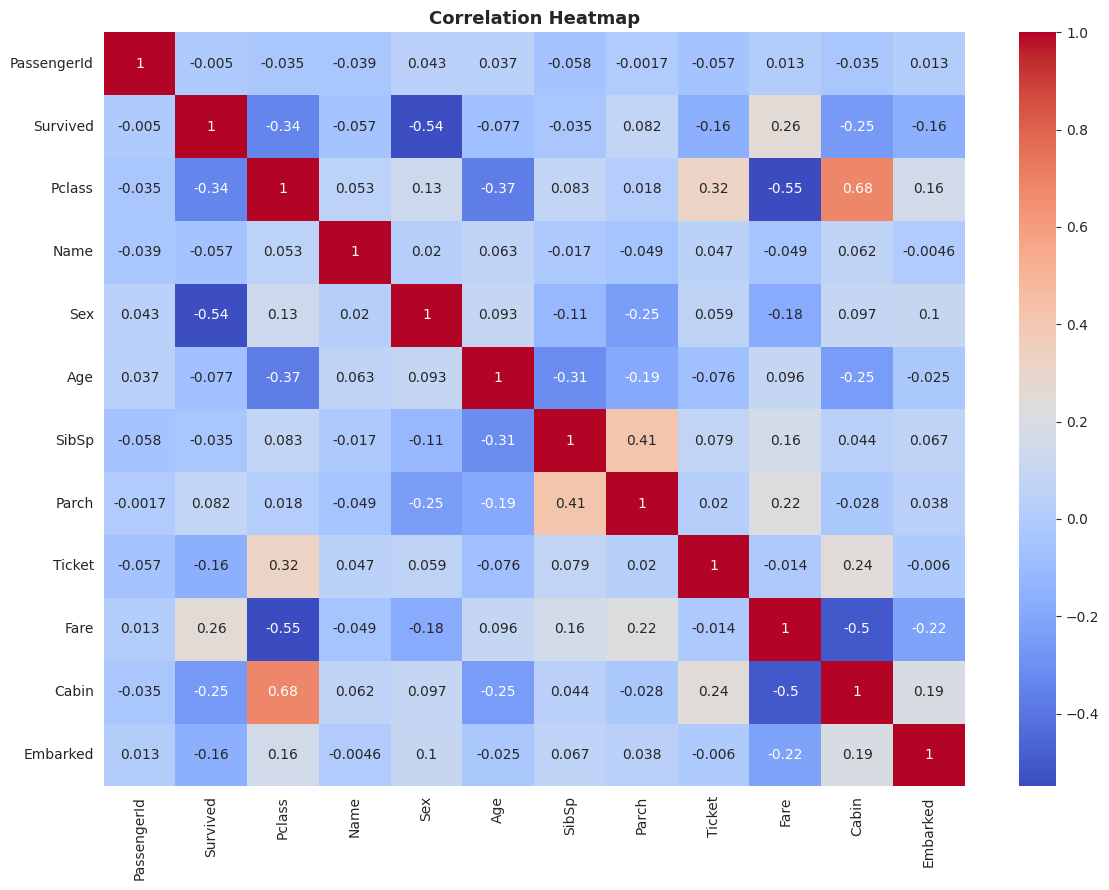

In [10]:
df_lencoder = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_lencoder[col] = le.fit_transform(df[col])

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_lencoder.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap', size=13, weight='bold')

fig.tight_layout()
plt.show()

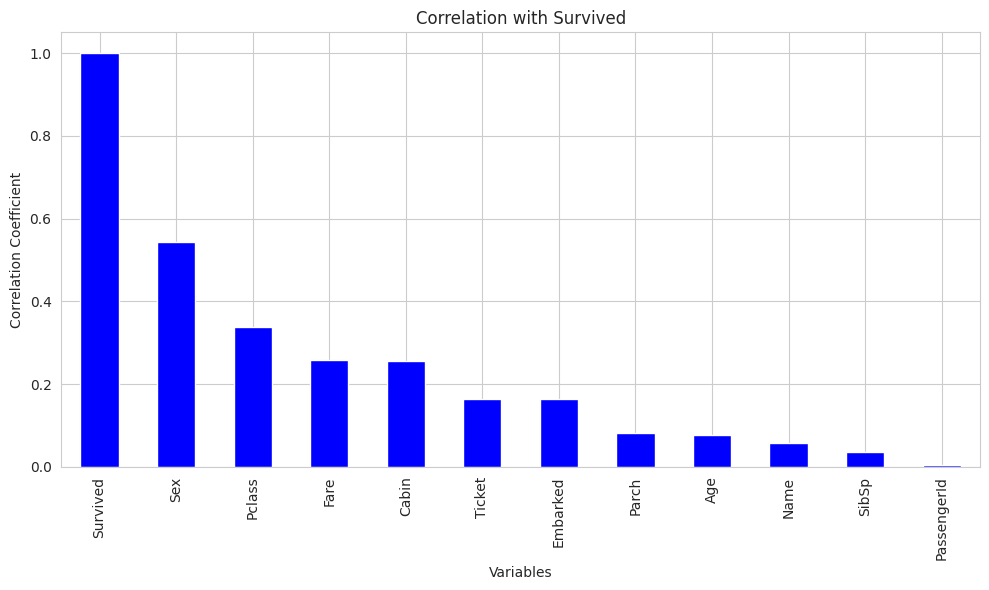

In [11]:
target_corr = df_lencoder.corr()['Survived']
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

target_corr_sorted.plot(kind='bar', ax=ax, color='blue')
ax.set_title(f'Correlation with Survived')
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficient')

fig.tight_layout()
plt.show()

# **Pre-processing**

In [ ]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Family Size'] = X_copy['SibSp'] + X_copy['Parch'] + 1
        X_copy['Fare Per Person'] = X_copy['Fare'] / X_copy['Family Size']

        X_copy['Fare Per Person'] = X_copy['Fare Per Person'].replace([np.inf, -np.inf], np.nan)

        bins = [0, 12, 19, 50, np.inf]
        labels = ['Child', 'Teenager', 'Adult', 'Senior']
        X_copy['Age Group'] = pd.cut(X_copy['Age'], bins=bins, labels=labels, include_lowest=True, right=False).astype(str)
        X_copy['Age Group'] = X_copy['Age Group'].replace('nan', 'Unknown')

        return X_copy

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            raise ValueError("input_features cannot be None for FeatureEngineer")
        new_features = ['Family Size', 'Fare Per Person', 'Age Group']
        return np.append(input_features, new_features)

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        columns_to_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age']
        return X.drop(columns=columns_to_drop)

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            raise ValueError("input_features cannot be None for FeatureDropper")
        columns_to_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age']
        return [col for col in input_features if col not in columns_to_drop]

## Pipeline

In [13]:
numerical_cols = ['Pclass', 'Family Size', 'Fare Per Person']
categorical_cols = ['Sex', 'Embarked']
ordinal_cols = ['Age Group']
target_column = ['PassengerId', 'Survived']

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', OrdinalEncoder())
])

In [15]:
transformer = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols),
    ('ord', ordinal_transformer, ordinal_cols)
    ],
    verbose_feature_names_out=False
)

In [16]:
preprocessor = Pipeline(steps=[
    ('feature_engineer', FeatureEngineer()),
    ('feature_dropper', FeatureDropper()),
    ('transformer', transformer)
])

# **Data Splitting**

In [17]:
X = df.drop(columns=target_column)
y = df[target_column]

X = preprocessor.fit_transform(X)
feature_names = preprocessor.named_steps['transformer'].get_feature_names_out()

df_train = pd.DataFrame(X, columns=feature_names)
df_train[target_column] = y.reset_index(drop=True)

df_train.sample(5)

,Pclass,Family Size,Fare Per Person,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age Group,PassengerId,Survived
570,-1.0,0.0,0.134010,0.0,1.0,0.0,0.0,1.0,2.0,571,1
500,0.0,0.0,0.022081,0.0,1.0,0.0,0.0,1.0,3.0,501,0
787,0.0,5.0,-0.209898,0.0,1.0,0.0,1.0,0.0,1.0,788,0
375,-2.0,1.0,1.997080,1.0,0.0,1.0,0.0,0.0,4.0,376,1
699,0.0,0.0,-0.039594,0.0,1.0,0.0,0.0,1.0,0.0,700,0


In [18]:
X = df_train.drop(columns=target_column)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling**

In [19]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Evaluation**

================ Random Forest Classifier ================
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


----------------------------------------



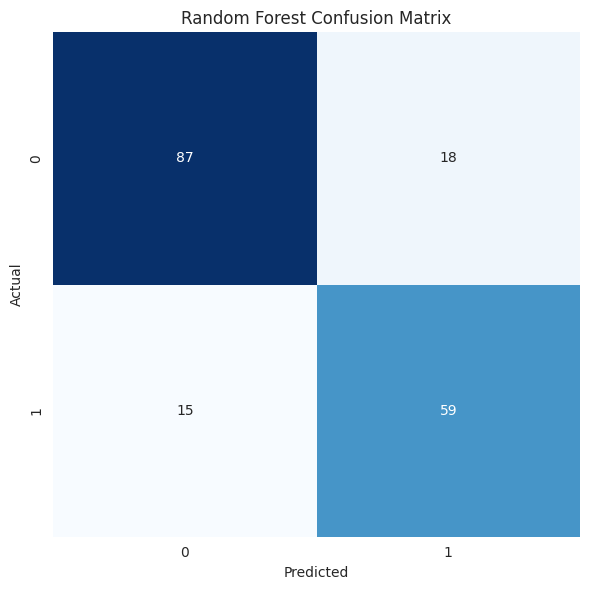

In [20]:
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("================ Random Forest Classifier ================")
print(classification_report(y_test, y_pred_rf))
print("\n" + "-"*40 + "\n")

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

fig.tight_layout()
plt.show()

## HyperParameter Tuning

In [21]:
param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_rs = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters (Random Search): {'n_estimators': np.int64(400), 'min_samples_split': 10, 'max_depth': np.int64(30), 'criterion': 'entropy'}


================ Random Search Forest Classifier ================
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179


----------------------------------------



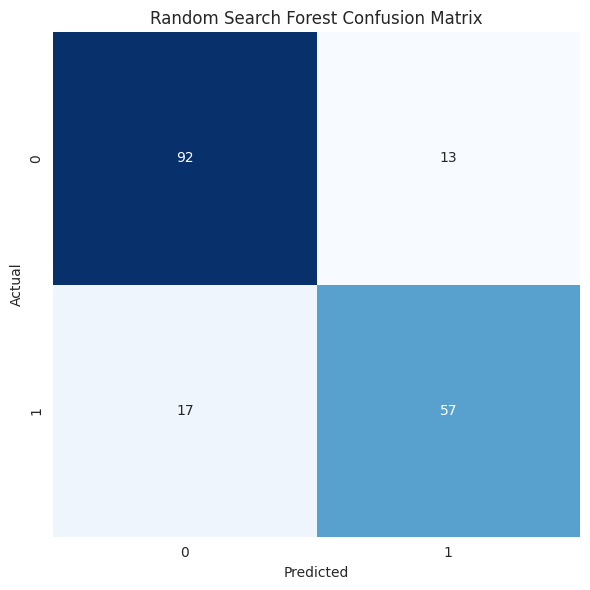

In [22]:
y_pred_rf_rs = best_rf_rs.predict(X_test)
cm_rf_rs = confusion_matrix(y_test, y_pred_rf_rs)

print("================ Random Search Forest Classifier ================")
print(classification_report(y_test, y_pred_rf_rs))
print("\n" + "-"*40 + "\n")

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_rf_rs, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Random Search Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

fig.tight_layout()
plt.show()

# **Inference**

In [23]:
test_path = '/content/test.csv'

df_test = pd.read_csv(test_path)
X = df_test.drop(columns='PassengerId')
y = df_test['PassengerId']

X = preprocessor.fit_transform(X)
feature_names = preprocessor.named_steps['transformer'].get_feature_names_out()

df_test = pd.DataFrame(X, columns=feature_names)
df_test['PassengerId'] = y.reset_index(drop=True)

df_test.sample(5)

,Pclass,Family Size,Fare Per Person,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age Group,PassengerId
135,0.0,0.0,-0.044053,0.0,1.0,0.0,0.0,1.0,0.0,1027
345,0.0,0.0,-0.055182,1.0,0.0,0.0,0.0,1.0,3.0,1237
2,-0.5,0.0,0.055863,0.0,1.0,0.0,1.0,0.0,2.0,894
201,0.0,2.0,-0.210509,0.0,1.0,0.0,0.0,1.0,1.0,1093
394,0.0,4.0,-0.232036,0.0,1.0,0.0,0.0,1.0,0.0,1286


In [24]:
predictions = best_rf_rs.predict(df_test.drop(columns='PassengerId'))
df_final = pd.DataFrame(df_test['PassengerId'])
df_final['Survived'] = predictions

df_final.sample(20)

,PassengerId,Survived
303,1195,0
230,1122,0
279,1171,0
4,896,0
358,1250,0
354,1246,0
168,1060,1
237,1129,0
409,1301,0
251,1143,0


In [25]:
df_final.to_csv('submission.csv', index=False)

End of Code.
